In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


**Reading DataFrame**

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#Cleaning Procedure
missing_mean = df["bmi"].mean()
df.fillna(missing_mean, inplace=True)
df = df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**EDA Process: Exploratory Data Analysis**

Text(0.5, 1.0, 'Distribution of Ages in Positive and Negative Signals')

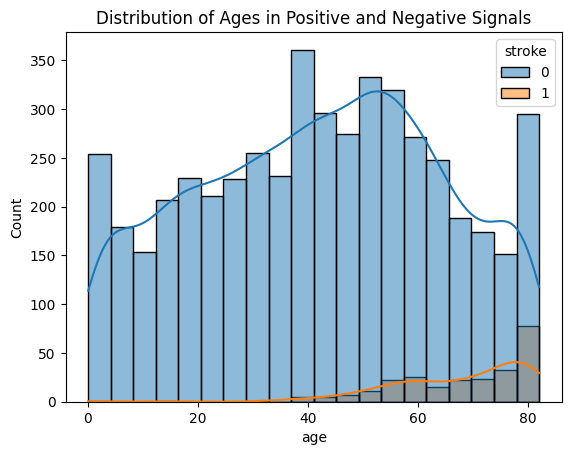

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = df, x = 'age', kde = True, hue = 'stroke')
plt.title("Distribution of Ages in Positive and Negative Signals")

Based on the visualization highlighting age, it is evident that datapoints with a positive signal tend to be distributed on the older side.

Text(0.5, 1.0, 'Distribution of Ages in Positive and Negative Signals')

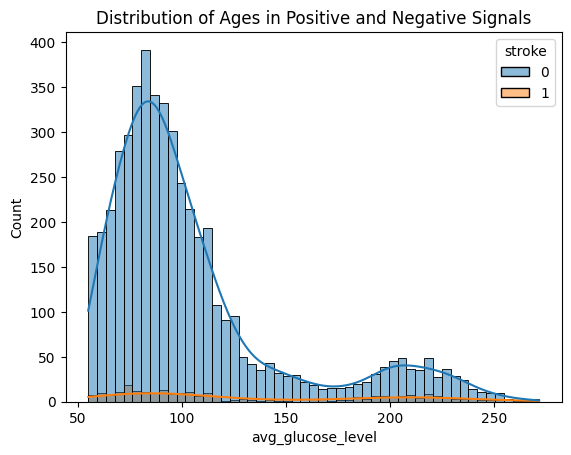

In [8]:
sns.histplot(data = df, x = 'avg_glucose_level', kde = True, hue = 'stroke')
plt.title("Distribution of Ages in Positive and Negative Signals")

Based on the visalization plotting average glucose levels,datapoints with a positive signal are roughly evenly distributed in age. Conversely, the distribution of those negative in signal is skewed to the right.

Text(0.5, 1.0, 'Distribution of Ages in Positive and Negative Signals')

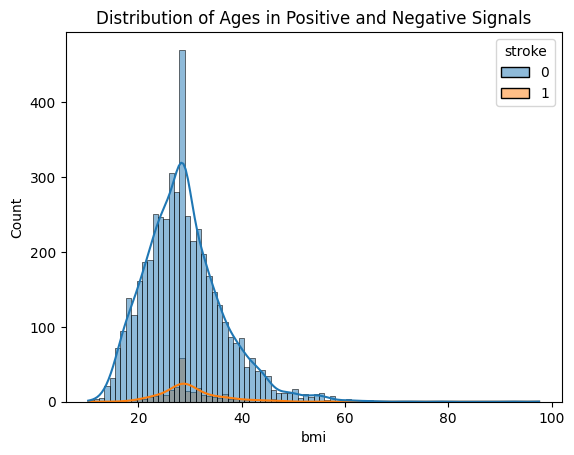

In [9]:
sns.histplot(data = df, x = 'bmi', kde = True, hue = 'stroke')
plt.title("Distribution of Ages in Positive and Negative Signals")

**One Hot Encoding Process**

In [10]:
categorical_variables = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for cat in categorical_variables:
    print(df[cat].value_counts(),"\n")

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 



In [11]:
#Cleaning Process: Eliminating the 'other' category in gender for simplicity
df = df[(df["gender"] == 'Male') | (df["gender"] == 'Female')]

One hot encoding function:
- Uses get_dummies to perform one-hot encoding 
- Concateate the original DataFrame and the one-hot encoded DataFrame
- Drop the original column as it's no longer needed

In [12]:
def one_hot_encode_column(df, column_name):
    one_hot_encoded = pd.get_dummies(df[column_name], prefix=column_name).astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df = df.drop(column_name, axis=1)
    return df

In [13]:
for cat in categorical_variables:
    df = one_hot_encode_column(df, cat)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


**Random Forest Classification**

Parameters:
- Max depth: 2

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(["stroke"], axis = 1)
y = df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [16]:
sum(prediction == y_test)/len(y_test)

0.9496086105675147

**Evaluations**

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3882
           1       0.00      0.00      0.00       206

    accuracy                           0.95      4088
   macro avg       0.47      0.50      0.49      4088
weighted avg       0.90      0.95      0.93      4088



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
